# 웹 페이지 구성 실습

📑 HTML (HyperText Markup Language)
  - 웹 브라우저에 표시되도록 설계된 문서의 표준 마크업 언어
  - 파일의 일반 확장자 : html, htm

📑 CSS (Cascading Style Sheets)
  - 마크업 언어가 실제 표시되는 방법을 기술하는 스타일 언어
  - 파일의 일반 확장자 : css

📑 Javascript
  - 동적기능과 연결을 담당하는 언어
  - 파일의 일반 확장자 : js



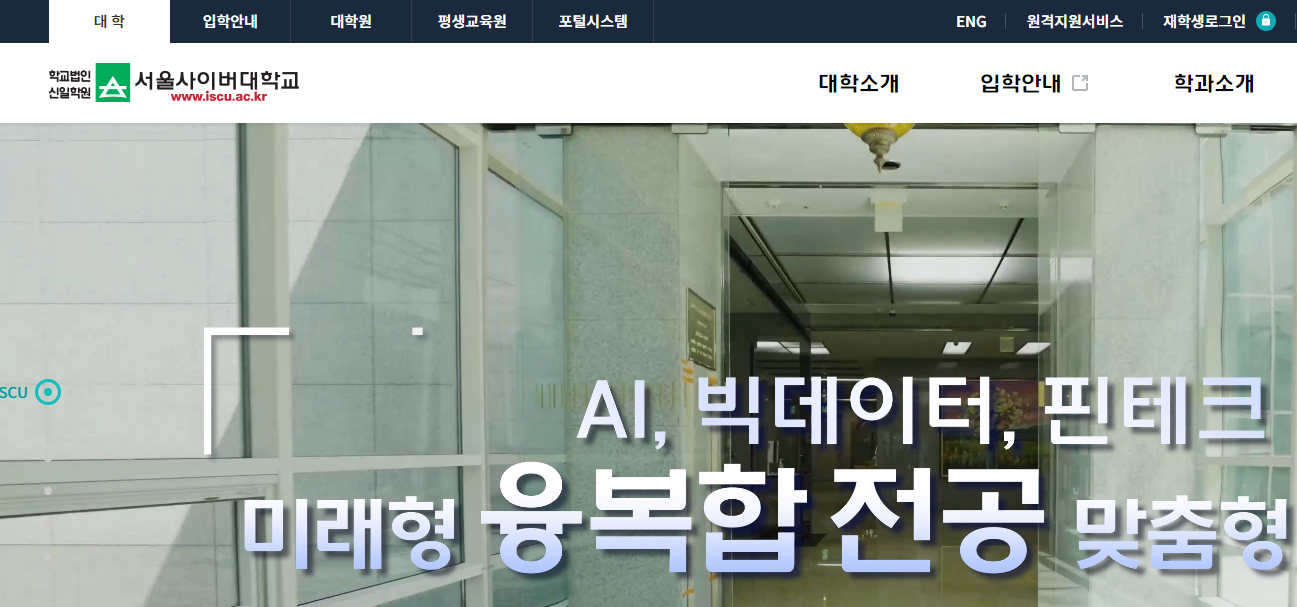

# 웹 스크래핑 실습(이미지)

## 스크래핑 준비

- 접속 사이트 : https://search.naver.com/search.naver?where=image&sm=tab_jum&query=

- 수집 대상 : 자동차 이미지 (car image)

- 수집건수 : 100건 (또는 가능한 많이)

- 저장 폴더 : /contents/images

## 스크래핑 프로그램 코드(prototype)

### 접속결과가 html 인 경우

- 접속 사이트 : https://www.google.com/search?q=car&sxsrf=ALeKk03xBalIZi7BAzyIRw8R4_KrIEYONg:1620885765119&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjv44CC_sXwAhUZyjgGHSgdAQ8Q_AUoAXoECAEQAw&cshid=1620885828054361

In [ ]:
import requests
from bs4 import BeautifulSoup

car_search_url = 'https://www.google.com/search?q=car&sxsrf=ALeKk03xBalIZi7BAzyIRw8R4_KrIEYONg:1620885765119&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjv44CC_sXwAhUZyjgGHSgdAQ8Q_AUoAXoECAEQAw&cshid=1620885828054361'
car_page = requests.get(car_search_url)
soup = BeautifulSoup(car_page.content, "html.parser")
# print(soup.prettify())

image_tags = soup.find_all('img', class_='yWs4tf')

image_links = []
for image_tag in image_tags:
  image_links.append(image_tag['src'])

image_links  

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWjmoLFs-4gvWfh8qpyR76rEtIK7He_6_PxHzC0sMl0xSvb55td-kx9Y0JsA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKPp-QwD1BQHilf-5K61gjtjoHEhQMLmIGwa82_xRVvZvj6nqWf1IRG-iv8A&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQicT4zApv6l6zrfXWsaL4IHvsq6YV2Nc1L8ogo9rzlkzAhJsHqwTB0Q6tfSzw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKfjNFZ83XxbZA3OKBjroZk9oPTL0wYh7W9lhtsBuuX2YCHMtaJwpk-97-sA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTYL3qPAoV8s7bzYDp8-z2R2nb57FA69zSHHhLwHsHY9Nob-4BdKVM2-tAopw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHq723R5pQW9_P9j6sdjurD9A-dQB0sQc_8kgu4Kmg9PCdvo2nTAVYpF_b_w&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpQEgWqZDn8FL_DzsXPX04VhuwZlTJQ6Ld8P1N_nBG6Wx6OPiVoyVuWkdzdg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6t1nsizgx3zk2BRBUrGb0wBVAdxroLbuVmQ0ONYvjlbqHhngBBPTkuZYH8A&s',
 'https://encrypted-tbn0.gstat

In [ ]:
result = requests.get(image_links[0])
with open('image_new.jpg', 'wb') as f:
  f.write(result.content)

### 접속결과가 javascript 인 경우

In [ ]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup

In [ ]:
key_word = 'car'
naver_images_page = "https://search.daum.net/search?w=img&nil_search=btn&DA=NTB&enc=utf8&q=" + key_word
result = requests.get(naver_images_page)
if result.status_code == 200:
    soup = BeautifulSoup(result.content, "html.parser")

In [ ]:
soup.contents

['\n',
 'doctype html',
 '\n',
 <html class="unix " lang="ko" xmlns="http://www.w3.org/1999/xhtml">
 <head profile="http://a9.com/-/spec/opensearch/1.1/">
 <meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="off" name="autocomplete"/>
 <meta content="always" name="referrer"/>
 <meta content="telephone=no" name="format-detection">
 <meta content="car – Daum 검색" property="og:title"/>
 <meta content="https://search.daum.net/search?w=img&amp;q=car" property="og:url"/>
 <meta content="Daum 검색에서 car에 대한 최신정보를 찾아보세요." property="og:description"/>
 <meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
 <meta content="다음검색" property="og:site_name"/>
 <title>car – Daum 검색</title>
 <link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
 <link charset="utf-8" href="//search1.daumcdn.net/search/stat

In [ ]:
image_list = soup.find_all('script')
image_list
image_list = str(image_list).split('url: "https://search')[:-1]

for x in image_list:
  if x.find('kakaocdn.net/argon') > 0:
    x = '"https://search' + x
    image_url = x.split(', w:')[0].replace('"', '')
    

In [ ]:
result = requests.get(image_url)
with open('image_js.jpg', 'wb') as f:
  f.write(result.content)

### 검색결과가 json 인 경우

- 접속 사이트 : https://unsplash.com/napi/search?query=car&per_page=20&xp=

In [3]:
import requests

url = 'https://unsplash.com/napi/search?query=car&per_page=20&xp='
result = requests.get(url)
result = result.json()
for item in result['photos']['results']:
  print(item['id'])
  print(item['urls']['full'])
  image_id = item['id']
  image_url = item['urls']['full']
  break

NEXoMtdCRyc
https://plus.unsplash.com/premium_photo-1669223469344-d1636335c9a7?crop=entropy&cs=tinysrgb&fm=jpg&ixid=MnwxMjA3fDB8MXxzZWFyY2h8MXx8Y2FyfGVufDB8fHx8MTY3MjMwMDg0Mg&ixlib=rb-4.0.3&q=80


In [4]:
result = requests.get(image_url)
with open('image.jpg', 'wb') as f:
  f.write(result.content)

## Jupyter Notebook 에서 이미지 보기

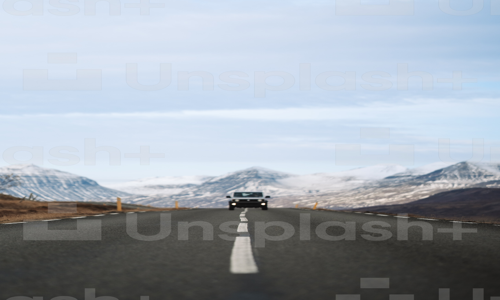

In [13]:
from PIL import Image

img = Image.open('image.jpg')
img.resize((500, 300))

# 웹 스크래핑 실습(정형데이터)

## 스크래핑 준비

- 접속 사이트 : https://search.naver.com/search.naver?where=m_view&sm=mtb_jum&query=


- 수집 대상 : python

- 수집건수 : 100건 (또는 가능한 많이)

- 저장 폴더 : /contents/csv

### 접속결과가 html 인 경우

In [ ]:
import requests
from bs4 import BeautifulSoup

url = f'https://m.search.naver.com/search.naver?where=m_view&sm=mtb_jum&query=python'
html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')

# total = soup.select('.api_txt_lines.total_tit')
# searchList = []

# for i in total:
#     temp = []
#     temp.append(i.text)
#     temp.append(i.attrs['href'])
#     searchList.append(temp)

# searchList
# f = open(f'{search}.csv', 'w', encoding='utf-8', newline='')
# csvWriter = csv.writer(f)
# for i in searchList:
#     csvWriter.writerow(i)

# f.close()

# print('완료되었습니다.')

### 접속결과가 json 인 경우

https://truman.tistory.com/110

http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2020-01-01/edate/2020-03-31